# LINEAR REGRESSION ILLUSTRATION

## Simple Linear Regression: Height vs Weight


The model presented here is a **simple linear regression** to predict *Height* from *Weight*.

### Purpose

This example demonstrates:
- Feature scaling with `StandardScaler`
- Model training using `LinearRegression`
- The advantage of using `Pipeline` for clean, reproducible workflows.

---

### Navigation  
- [Model with pipeline](#without-pipeline)
- [Model without pipeline](#with-pipeline)
- [Saving Model as Pickle file](#saving-model-as-pickle-file)


### Outline

#### Key Concepts
- **Linear regression model**: $y = mx + b$
- **Standardization** of input features
- **Pipeline** construction and usage



---

**Note:** This notebook serves as an educational illustration of pipelines in `scikit-learn`.

---

### Example Lists

- Step-by-step implementation
    - Data loading
    - Feature scaling
    - Model training

1. Load data
2. Preprocess features
3. Train model
4. Evaluate and plot results

## Without pipeline

Model intercept (b0): 157.50
Model coefficient (b1): 17.03
R-squared score: 0.78


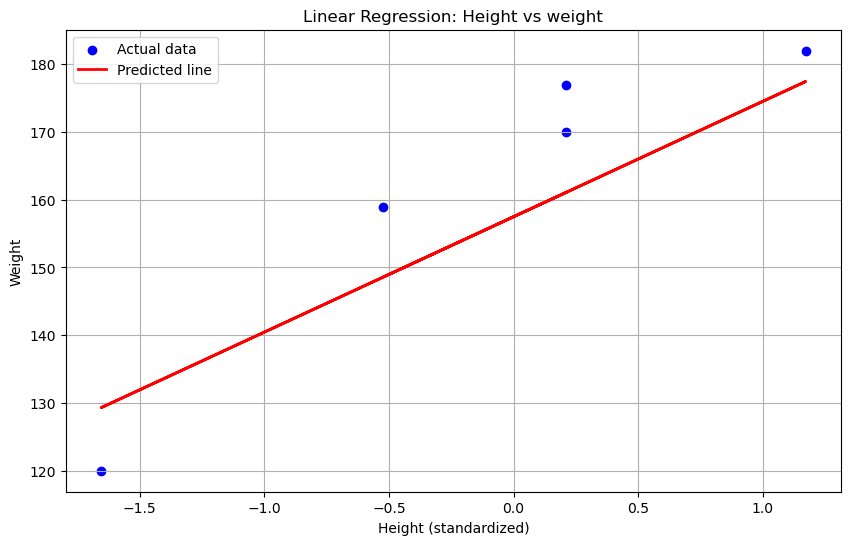

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data
dt = r"..\data\height-weight.csv"
data = pd.read_csv(dt) 
X = data[['Weight']]  
y = data['Height']    


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


print(f"Model intercept (b0): {model.intercept_:.2f}")
print(f"Model coefficient (b1): {model.coef_[0]:.2f}")
print(f"R-squared score: {model.score(X_test_scaled, y_test):.2f}")


plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled, y_test, color='blue', label='Actual data')
plt.plot(X_test_scaled, y_pred, color='red', linewidth=2, label='Predicted line')
plt.xlabel('Height (standardized)')
plt.ylabel('Weight')
plt.title('Linear Regression: Height vs weight')
plt.legend()
plt.grid(True)
plt.show()

## With pipeline

Model intercept (b0): 157.50
Model coefficient (b1): 17.03
R-squared score: 0.78


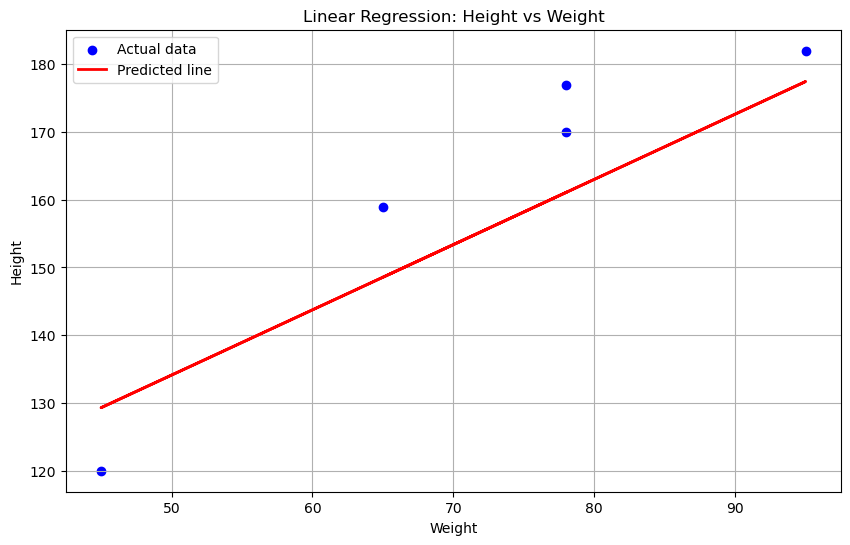

In [4]:
# USE PEPELINE

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load the data
dt = r"..\data\height-weight.csv"
X = data[['Weight']]  
y = data['Height']    

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Fit 
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)


model = pipe.named_steps['model']
print(f"Model intercept (b0): {model.intercept_:.2f}")
print(f"Model coefficient (b1): {model.coef_[0]:.2f}")
print(f"R-squared score: {pipe.score(X_test, y_test):.2f}")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted line')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Linear Regression: Height vs Weight')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
from sklearn import set_config
set_config(display='diagram')
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

#### SAVE MODEL AS PICKEL FILE

## Saving Model as Pickle file

In [ ]:
import joblib

joblib.dump(model, 'linear_regression_model.pkl')